In [1]:
import pyspark
from pyspark.sql.functions import log

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#create a dataframe (RDD if our data called for it). We have no null values.
data = spark.read.csv("data/data.csv",header = True)
data.columns

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 '_c32']

In [3]:
"""
Tumors that are malignant tend to not have a defined edge and would spill over into places with normal cells.
Tumors that are benign tend to grow in a well defined area and not spread to other parts.

Some things we hypothesize:
We predict that a larger radius would be a correlated with having a malginant tumor for this reason.
We predict that a larger perimter would be correlated with having a malignant tumor.
We predict that a larger area would be correlated with having a malignant tumor.


"""
print 

In [4]:
data.select(data['diagnosis'],data['area_mean'],data['compactness_mean'], \
            data['smoothness_mean'],data['radius_mean']).show(5)

+---------+---------+----------------+---------------+-----------+
|diagnosis|area_mean|compactness_mean|smoothness_mean|radius_mean|
+---------+---------+----------------+---------------+-----------+
|        M|     1001|          0.2776|         0.1184|      17.99|
|        M|     1326|         0.07864|        0.08474|      20.57|
|        M|     1203|          0.1599|         0.1096|      19.69|
|        M|    386.1|          0.2839|         0.1425|      11.42|
|        M|     1297|          0.1328|         0.1003|      20.29|
+---------+---------+----------------+---------------+-----------+
only showing top 5 rows



In [5]:
# Temp View
data.createOrReplaceTempView("temp")

In [6]:
"""

Looking at the Means


"""
print 

In [7]:
"""


1. Area_Mean


"""
print 

In [31]:
# Use SQL to create dataframes
sqldata_M = spark.sql("SELECT * FROM temp WHERE diagnosis = 'M'").select(data['diagnosis'],\
                                                                         data['area_mean'])
sqldata_B = spark.sql("SELECT * FROM temp WHERE diagnosis = 'B'").select(data['diagnosis'],\
                                                                         data['area_mean'])

# Create a log of the area_mean
sqldata_M = sqldata_M.withColumn("log_area_mean",log("area_mean"))
sqldata_B = sqldata_B.withColumn("log_area_mean",log("area_mean"))

print "---Benign Tumors---"
sqldata_B.select(sqldata_B['diagnosis'],sqldata_B['area_mean'],sqldata_B['log_area_mean']).show(5)

print "\n---Malignant Tumors---"
sqldata_M.select(sqldata_M['diagnosis'],sqldata_M['area_mean'],sqldata_M['log_area_mean']).show(5)

print "-------------------------------Average, Standard Deviation, Max, Min, Count--------------------------------"
print "---Benign Tumors: ", sqldata_B.count()
sqldata_B.describe(['diagnosis','area_mean','log_area_mean']).show()

print "---Malignant Tumors: ", sqldata_M.count()
sqldata_M.describe(['diagnosis','area_mean','log_area_mean']).show()

---Benign Tumors---
+---------+---------+-----------------+
|diagnosis|area_mean|    log_area_mean|
+---------+---------+-----------------+
|        B|    566.3|6.339123973119759|
|        B|      520|6.253828811575473|
|        B|    273.9|5.612763076269032|
|        B|    523.8|6.261109932073611|
|        B|    201.9|5.307772525318792|
+---------+---------+-----------------+
only showing top 5 rows


---Malignant Tumors---
+---------+---------+------------------+
|diagnosis|area_mean|     log_area_mean|
+---------+---------+------------------+
|        M|     1001|  6.90875477931522|
|        M|     1326| 7.189922170745808|
|        M|     1203|7.0925737159746784|
|        M|    386.1| 5.956096403270191|
|        M|     1297| 7.167809184316444|
+---------+---------+------------------+
only showing top 5 rows

-------------------------------Average, Standard Deviation, Max, Min, Count--------------------------------
---Benign Tumors:  357
+-------+---------+------------------+--------

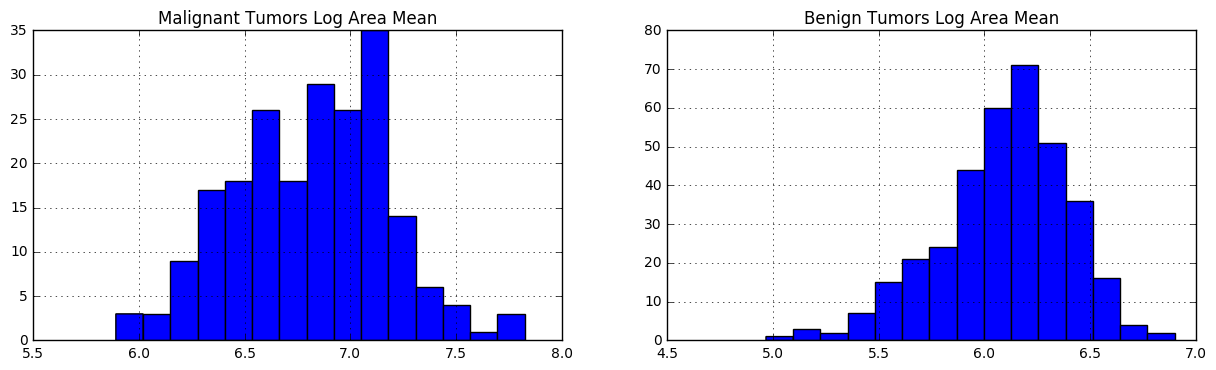

In [32]:
#plotting them seperately
fig, (axis1,axis2) = plt.subplots(1,2,figsize = (15,4))
axis1.set_title("Malignant Tumors Log Area Mean")
temp1 = sqldata_M.toPandas()
temp1['log_area_mean'].hist(bins = 15, ax = axis1)

axis2.set_title("Benign Tumors Log Area Mean")
temp2 = sqldata_B.toPandas()
temp2['log_area_mean'].hist(bins = 15, ax = axis2)

plt.show()

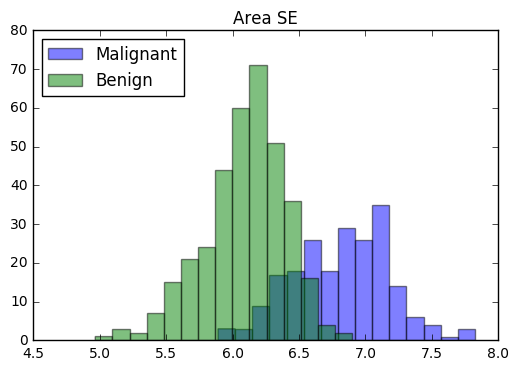

In [33]:
"""
Here I plot them together
"""
plt.hist(temp1['log_area_mean'], bins = 15, alpha=0.5, label='Malignant')
plt.hist(temp2['log_area_mean'], bins = 15, alpha=0.5, label='Benign')

plt.legend(loc='upper left')
plt.title("Area SE")

plt.show()

In [11]:
"""
As we see by the histogram, the higher the mean the more likely the patient has a malignant tumor.
This goes well with our hypothesis.


"""
print

In [12]:
"""


2. Compactness_Mean



"""
print 

In [35]:
sqldata_M = spark.sql("SELECT * FROM temp WHERE diagnosis = 'M'").select(data['diagnosis'],\
                                                                         data['compactness_mean'])
sqldata_B = spark.sql("SELECT * FROM temp WHERE diagnosis = 'B'").select(data['diagnosis'],\
                                                                         data['compactness_mean'])

sqldata_M = sqldata_M.withColumn("log_compactness_mean",log("compactness_mean"))
sqldata_B = sqldata_B.withColumn("log_compactness_mean",log("compactness_mean"))

print "---Benign Tumors---"
sqldata_B.select(sqldata_B['diagnosis'],sqldata_B['compactness_mean'],sqldata_B['log_compactness_mean']).show(5)

print "\n---Malignant Tumors---"
sqldata_M.select(sqldata_M['diagnosis'],sqldata_M['compactness_mean'],sqldata_M['log_compactness_mean']).show(5)

print "---------------------------------------------------------------"
print "---Benign Tumors: ", sqldata_B.count()
sqldata_B.describe(['diagnosis','compactness_mean','log_compactness_mean']).show()

print "---Malignant Tumors: ", sqldata_M.count()
sqldata_M.describe(['diagnosis','compactness_mean','log_compactness_mean']).show()

---Benign Tumors---
+---------+----------------+--------------------+
|diagnosis|compactness_mean|log_compactness_mean|
+---------+----------------+--------------------+
|        B|         0.08129|  -2.509732271223656|
|        B|           0.127| -2.0635681925235456|
|        B|         0.06492| -2.7345995363357467|
|        B|         0.03766| -3.2791567557531307|
|        B|         0.05943|  -2.822956129603568|
+---------+----------------+--------------------+
only showing top 5 rows


---Malignant Tumors---
+---------+----------------+--------------------+
|diagnosis|compactness_mean|log_compactness_mean|
+---------+----------------+--------------------+
|        M|          0.2776| -1.2815740503494875|
|        M|         0.07864|  -2.542874803143226|
|        M|          0.1599| -1.8332066591422287|
|        M|          0.2839| -1.2591332155032116|
|        M|          0.1328| -2.0189110419398038|
+---------+----------------+--------------------+
only showing top 5 rows

------

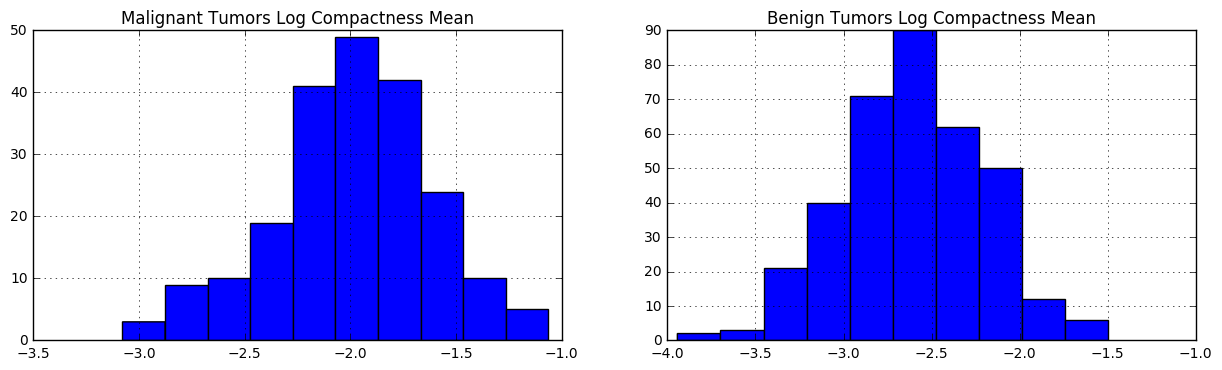

In [36]:
# Regular compactness is too clumped to make good histograms
fig, (axis1,axis2) = plt.subplots(1,2,figsize = (15,4))
axis1.set_title("Malignant Tumors Log Compactness Mean")
temp = sqldata_M.toPandas()
temp['log_compactness_mean'].hist(bins = 10, ax = axis1)

axis2.set_title("Benign Tumors Log Compactness Mean")
temp2 = sqldata_B.toPandas()
temp2['log_compactness_mean'].hist(bins = 10,ax = axis2)

plt.show()

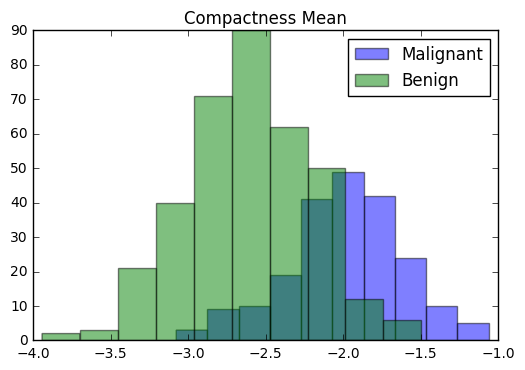

In [37]:
#Plotting them together
plt.hist(temp['log_compactness_mean'], bins = 10, alpha=0.5, label='Malignant')
plt.hist(temp2['log_compactness_mean'], bins = 10, alpha=0.5, label='Benign')
plt.legend(loc='upper right')
plt.title("Compactness Mean")
plt.show()

In [16]:
"""
From the histogram we understand that the more compact or clustered the cells are the more likely the tumor
is malignant. 
This agrees with our hypothesis.

"""
print

In [17]:
"""


3. Smoothness Mean



"""
print

In [38]:
# Use SQL to create dataframes
sqldata_M = spark.sql("SELECT * FROM temp WHERE diagnosis = 'M'").select(data['diagnosis'],\
                                                                         data['smoothness_mean'])
sqldata_B = spark.sql("SELECT * FROM temp WHERE diagnosis = 'B'").select(data['diagnosis'],\
                                                                         data['smoothness_mean'])

# Create a log of the area_mean
sqldata_M = sqldata_M.withColumn("log_smoothness_mean",log("smoothness_mean"))
sqldata_B = sqldata_B.withColumn("log_smoothness_mean",log("smoothness_mean"))

print "---Benign Tumors---"
sqldata_B.select(sqldata_B['diagnosis'],sqldata_B['smoothness_mean'],sqldata_B['log_smoothness_mean']).show(5)

print "\n---Malignant Tumors---"
sqldata_M.select(sqldata_M['diagnosis'],sqldata_M['smoothness_mean'],sqldata_M['log_smoothness_mean']).show(5)

print "---------------------------------------------------------------"
print "---Benign Tumors: ", sqldata_B.count()
sqldata_B.describe(['diagnosis','smoothness_mean','log_smoothness_mean']).show()

print "---Malignant Tumors: ", sqldata_M.count()
sqldata_M.describe(['diagnosis','smoothness_mean','log_smoothness_mean']).show()

---Benign Tumors---
+---------+---------------+-------------------+
|diagnosis|smoothness_mean|log_smoothness_mean|
+---------+---------------+-------------------+
|        B|        0.09779|-2.3249329566579533|
|        B|         0.1075|-2.2302644314144198|
|        B|         0.1024|-2.2788685663767296|
|        B|        0.08983|-2.4098362837410217|
|        B|          0.086|-2.4534079827286295|
+---------+---------------+-------------------+
only showing top 5 rows


---Malignant Tumors---
+---------+---------------+-------------------+
|diagnosis|smoothness_mean|log_smoothness_mean|
+---------+---------------+-------------------+
|        M|         0.1184| -2.133686556532232|
|        M|        0.08474| -2.468167533783724|
|        M|         0.1096| -2.210917904468222|
|        M|         0.1425|-1.9484132792734319|
|        M|         0.1003|-2.2995895840142473|
+---------+---------------+-------------------+
only showing top 5 rows

------------------------------------------

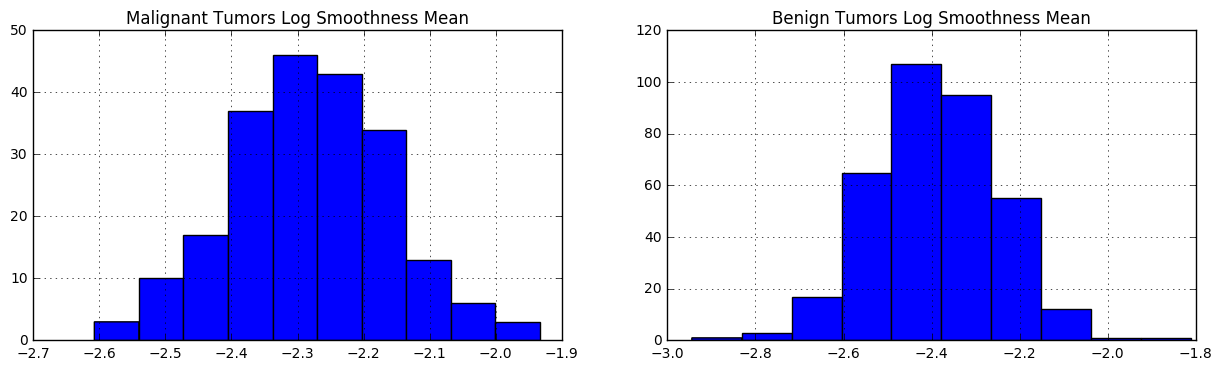

In [39]:
# Regular Smoothness is too clumped to make good histograms
fig, (axis1,axis2) = plt.subplots(1,2,figsize = (15,4))
axis1.set_title("Malignant Tumors Log Smoothness Mean")
temp = sqldata_M.toPandas()
temp['log_smoothness_mean'].hist(bins = 10, ax = axis1)

axis2.set_title("Benign Tumors Log Smoothness Mean")
temp2 = sqldata_B.toPandas()
temp2['log_smoothness_mean'].hist(bins = 10,ax = axis2)

plt.show()

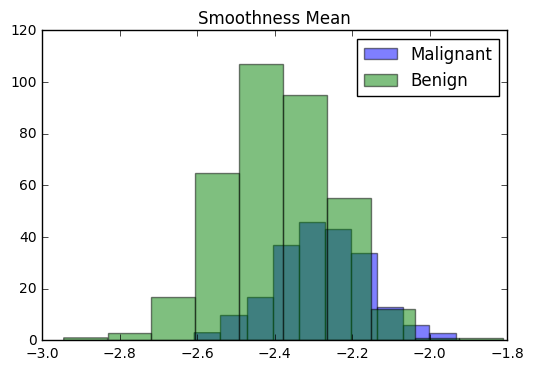

In [40]:
#Plotting them together
plt.hist(temp['log_smoothness_mean'], bins = 10, alpha=0.5, label='Malignant')
plt.hist(temp2['log_smoothness_mean'], bins = 10, alpha=0.5, label='Benign')
plt.legend(loc='upper right')
plt.title("Smoothness Mean")
plt.show()

In [21]:
"""

It seems the smoother the tumor, the more likely it is to be a malignant tumor.
Because they are so close together, this might be less of a impactful category for classification.



"""
print

In [22]:
"""


4. Radius Mean



"""
print 

In [41]:
# Use SQL to create dataframes
sqldata_M = spark.sql("SELECT * FROM temp WHERE diagnosis = 'M'").select(data['diagnosis'],\
                                                                         data['radius_mean'])
sqldata_B = spark.sql("SELECT * FROM temp WHERE diagnosis = 'B'").select(data['diagnosis'],\
                                                                         data['radius_mean'])

# Create a log of the area_se
sqldata_M = sqldata_M.withColumn("log_radius_mean",log("radius_mean"))
sqldata_B = sqldata_B.withColumn("log_radius_mean",log("radius_mean"))

print "---Benign Tumors---"
sqldata_B.select(sqldata_B['diagnosis'],sqldata_B['radius_mean'],sqldata_B['log_radius_mean']).show(5)

print "\n---Malignant Tumors---"
sqldata_M.select(sqldata_M['diagnosis'],sqldata_M['radius_mean'],sqldata_M['log_radius_mean']).show(5)

print "---------------------------------------------------------------"
print "---Benign Tumors: ", sqldata_B.count()
sqldata_B.describe(['diagnosis','radius_mean','log_radius_mean']).show()

print "---Malignant Tumors: ", sqldata_M.count()
sqldata_M.describe(['diagnosis','radius_mean','log_radius_mean']).show()

---Benign Tumors---
+---------+-----------+------------------+
|diagnosis|radius_mean|   log_radius_mean|
+---------+-----------+------------------+
|        B|      13.54| 2.605648267484129|
|        B|      13.08|2.5710843460290524|
|        B|      9.504| 2.251712762620289|
|        B|      13.03| 2.567254391136754|
|        B|      8.196| 2.103646230376653|
+---------+-----------+------------------+
only showing top 5 rows


---Malignant Tumors---
+---------+-----------+------------------+
|diagnosis|radius_mean|   log_radius_mean|
+---------+-----------+------------------+
|        M|      17.99|2.8898160479624417|
|        M|      20.57|3.0238337036648657|
|        M|      19.69|2.9801108926510342|
|        M|      11.42| 2.435366204227864|
|        M|      20.29|3.0101281538377234|
+---------+-----------+------------------+
only showing top 5 rows

---------------------------------------------------------------
---Benign Tumors:  357
+-------+---------+------------------+-------

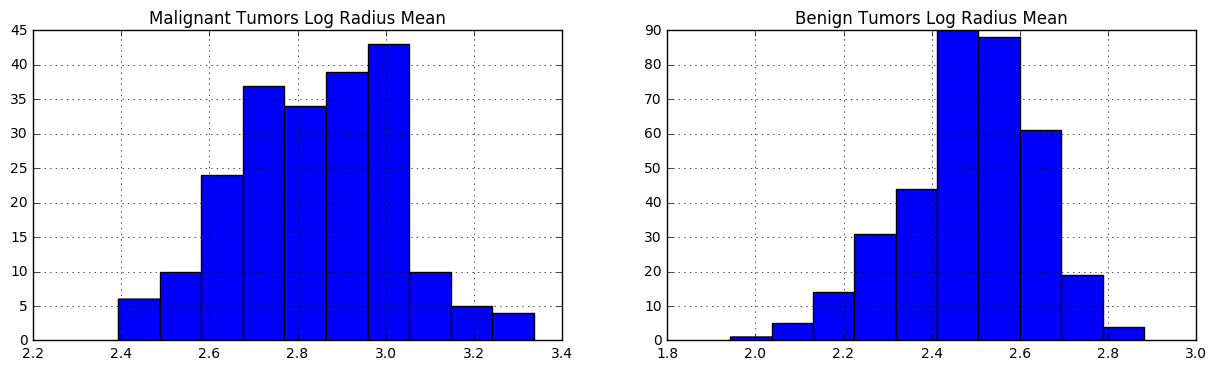

In [42]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize = (15,4))
axis1.set_title("Malignant Tumors Log Radius Mean")
temp = sqldata_M.toPandas()
temp['log_radius_mean'].hist(bins = 10, ax = axis1)

axis2.set_title("Benign Tumors Log Radius Mean")
temp2 = sqldata_B.toPandas()
temp2['log_radius_mean'].hist(bins = 10,ax = axis2)

plt.show()


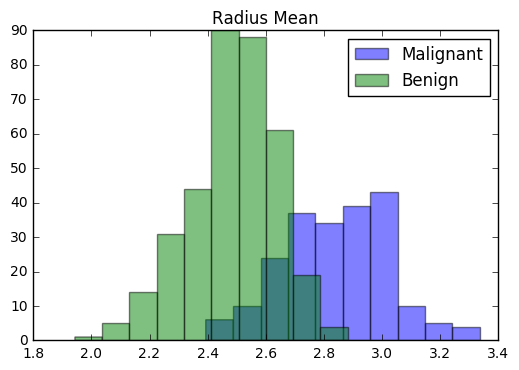

In [43]:
#Plotting them together
plt.hist(temp['log_radius_mean'], bins = 10, alpha=0.5, label='Malignant')
plt.hist(temp2['log_radius_mean'], bins = 10, alpha=0.5, label='Benign')
plt.legend(loc='upper right')
plt.title("Radius Mean")
plt.show()

In [26]:
"""
By he histogram we see that the larger the radius mean is, the more likely the patient has a malignant tumor.
This agrees with our hypothesis.


It is unclear near 2.65 as to which category the tumor falls under.

"""
print

In [121]:
"""


Looking at SE's



"""
print

In [122]:
"""


1. Area SE



"""
print

In [29]:
# Use SQL to create dataframes
sqldata_M = spark.sql("SELECT * FROM temp WHERE diagnosis = 'M'").select(data['diagnosis'],\
                                                                         data['area_se'])
sqldata_B = spark.sql("SELECT * FROM temp WHERE diagnosis = 'B'").select(data['diagnosis'],\
                                                                         data['area_se'])

# Create a log of the area_mean
sqldata_M = sqldata_M.withColumn("log_area_se",log("area_se"))
sqldata_B = sqldata_B.withColumn("log_area_se",log("area_se"))

print "---Benign Tumors---"
sqldata_B.select(sqldata_B['diagnosis'],sqldata_B['area_se'],sqldata_B['log_area_se']).show(5)

print "\n---Malignant Tumors---"
sqldata_M.select(sqldata_M['diagnosis'],sqldata_M['area_se'],sqldata_M['log_area_se']).show(5)

print "---------------------------------------------------------------"
print "---Benign Tumors: ", sqldata_B.count()
sqldata_B.describe(['diagnosis','area_se','log_area_se']).show()

print "---Malignant Tumors: ", sqldata_M.count()
sqldata_M.describe(['diagnosis','area_se','log_area_se']).show()

---Benign Tumors---
+---------+-------+------------------+
|diagnosis|area_se|       log_area_se|
+---------+-------+------------------+
|        B|  23.56| 3.159550358783386|
|        B|  14.67|2.6858045921548905|
|        B|   15.7|2.7536607123542622|
|        B|  14.16|2.6504210882655737|
|        B|  8.205|2.1047437245420544|
+---------+-------+------------------+
only showing top 5 rows


---Malignant Tumors---
+---------+-------+------------------+
|diagnosis|area_se|       log_area_se|
+---------+-------+------------------+
|        M|  153.4|5.0330488889331555|
|        M|  74.08| 4.305145590337924|
|        M|  94.03| 4.543613880288985|
|        M|  27.23|3.3043193066856684|
|        M|  94.44| 4.547964712217312|
+---------+-------+------------------+
only showing top 5 rows

---------------------------------------------------------------
---Benign Tumors:  357
+-------+---------+------------------+------------------+
|summary|diagnosis|           area_se|       log_area_se|
+

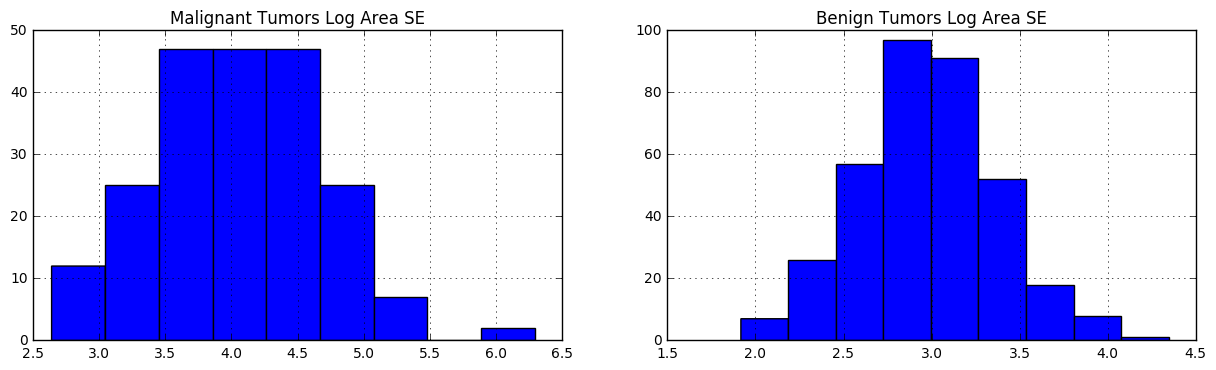

In [30]:
#plotting them seperately
fig, (axis1,axis2) = plt.subplots(1,2,figsize = (15,4))
axis1.set_title("Malignant Tumors Log Area SE")
temp = sqldata_M.toPandas()
temp['log_area_se'].hist(bins = 9, ax = axis1)

axis2.set_title("Benign Tumors Log Area SE")
temp2 = sqldata_B.toPandas()
temp2['log_area_se'].hist(bins = 9, ax = axis2)

plt.show()

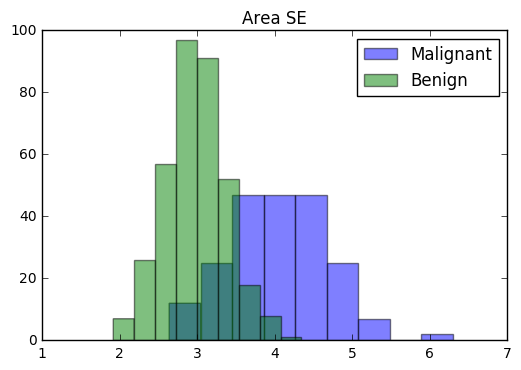

In [31]:
#Plotting them together
plt.hist(temp['log_area_se'], bins = 9, alpha=0.5, label='Malignant')
plt.hist(temp2['log_area_se'], bins = 9, alpha=0.5, label='Benign')
plt.legend(loc='upper right')
plt.title("Area SE")
plt.show()

In [32]:
"""
2. Compactness SE
"""

'\n2. Compactness SE\n'

In [33]:
sqldata_M = spark.sql("SELECT * FROM temp WHERE diagnosis = 'M'").select(data['diagnosis'],\
                                                                         data['compactness_se'])
sqldata_B = spark.sql("SELECT * FROM temp WHERE diagnosis = 'B'").select(data['diagnosis'],\
                                                                         data['compactness_se'])

sqldata_M = sqldata_M.withColumn("log_compactness_se",log("compactness_se"))
sqldata_B = sqldata_B.withColumn("log_compactness_se",log("compactness_se"))

print "---Benign Tumors---"
sqldata_B.select(sqldata_B['diagnosis'],sqldata_B['compactness_se'],sqldata_B['log_compactness_se']).show(5)

print "\n---Malignant Tumors---"
sqldata_M.select(sqldata_M['diagnosis'],sqldata_M['compactness_se'],sqldata_M['log_compactness_se']).show(5)

print "---------------------------------------------------------------"
print "---Benign Tumors: ", sqldata_B.count()
sqldata_B.describe(['diagnosis','compactness_se','log_compactness_se']).show()

print "---Malignant Tumors: ", sqldata_M.count()
sqldata_M.describe(['diagnosis','compactness_se','log_compactness_se']).show()

---Benign Tumors---
+---------+--------------+-------------------+
|diagnosis|compactness_se| log_compactness_se|
+---------+--------------+-------------------+
|        B|        0.0146| -4.226733750267846|
|        B|       0.01898| -3.964369485800355|
|        B|       0.01432|-4.2460981174496375|
|        B|      0.004899| -5.318724176325699|
|        B|       0.01646|-4.1068220837332134|
+---------+--------------+-------------------+
only showing top 5 rows


---Malignant Tumors---
+---------+--------------+-------------------+
|diagnosis|compactness_se| log_compactness_se|
+---------+--------------+-------------------+
|        M|       0.04904|-3.0151189873541813|
|        M|       0.01308| -4.336670932953084|
|        M|       0.04006| -3.217376948744465|
|        M|       0.07458| -2.595882904231462|
|        M|       0.02461|-3.7046024145791727|
+---------+--------------+-------------------+
only showing top 5 rows

------------------------------------------------------------

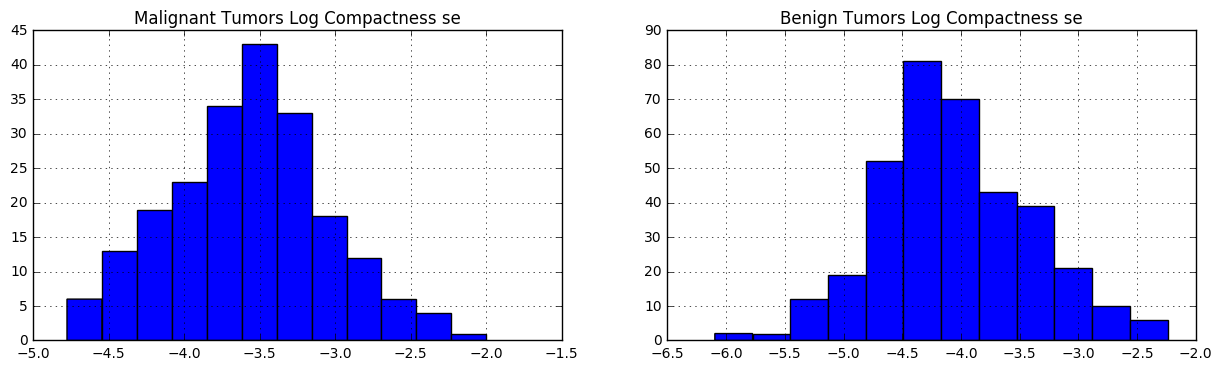

In [34]:
# Regular compactness is too clumped to make good histograms
fig, (axis1,axis2) = plt.subplots(1,2,figsize = (15,4))
axis1.set_title("Malignant Tumors Log Compactness se")
temp = sqldata_M.toPandas()
temp['log_compactness_se'].hist(bins = 12, ax = axis1)

axis2.set_title("Benign Tumors Log Compactness se")
temp2 = sqldata_B.toPandas()
temp2['log_compactness_se'].hist(bins = 12, ax = axis2)

plt.show()

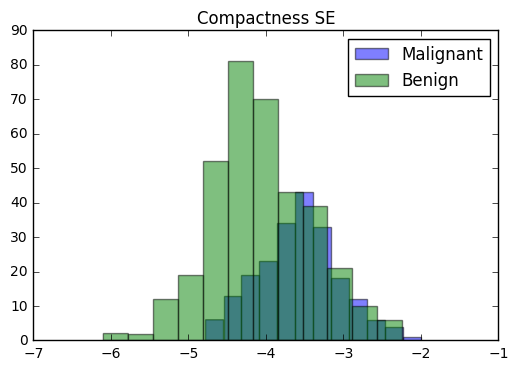

In [35]:
#Plotting them together
plt.hist(temp['log_compactness_se'], bins = 12, alpha=0.5, label='Malignant')
plt.hist(temp2['log_compactness_se'], bins = 12, alpha=0.5, label='Benign')
plt.legend(loc='upper right')
plt.title("Compactness SE")
plt.show()

In [36]:
"""
3. Smoothness SE
"""

'\n3. Smoothness SE\n'

In [37]:
# Use SQL to create dataframes
sqldata_M = spark.sql("SELECT * FROM temp WHERE diagnosis = 'M'").select(data['diagnosis'],\
                                                                         data['smoothness_se'])
sqldata_B = spark.sql("SELECT * FROM temp WHERE diagnosis = 'B'").select(data['diagnosis'],\
                                                                         data['smoothness_se'])

# Create a log of the area_se
sqldata_M = sqldata_M.withColumn("log_smoothness_se",log("smoothness_se"))
sqldata_B = sqldata_B.withColumn("log_smoothness_se",log("smoothness_se"))

print "---Benign Tumors---"
sqldata_B.select(sqldata_B['diagnosis'],sqldata_B['smoothness_se'],sqldata_B['log_smoothness_se']).show(5)

print "\n---Malignant Tumors---"
sqldata_M.select(sqldata_M['diagnosis'],sqldata_M['smoothness_se'],sqldata_M['log_smoothness_se']).show(5)

print "---------------------------------------------------------------"
print "---Benign Tumors: ", sqldata_B.count()
sqldata_B.describe(['diagnosis','smoothness_se','log_smoothness_se']).show()

print "---Malignant Tumors: ", sqldata_M.count()
sqldata_M.describe(['diagnosis','smoothness_se','log_smoothness_se']).show()


---Benign Tumors---
+---------+-------------+------------------+
|diagnosis|smoothness_se| log_smoothness_se|
+---------+-------------+------------------+
|        B|     0.008462|-4.772169726684261|
|        B|     0.004097|-5.497500280417403|
|        B|     0.009606|-4.645367375739505|
|        B|     0.004352|-5.437119769428495|
|        B|     0.008968|-4.714092593212278|
+---------+-------------+------------------+
only showing top 5 rows


---Malignant Tumors---
+---------+-------------+------------------+
|diagnosis|smoothness_se| log_smoothness_se|
+---------+-------------+------------------+
|        M|     0.006399|-5.051613550824814|
|        M|     0.005225|-5.254300481131263|
|        M|      0.00615| -5.09130319716371|
|        M|      0.00911| -4.69838256771027|
|        M|      0.01149|-4.466278187121473|
+---------+-------------+------------------+
only showing top 5 rows

---------------------------------------------------------------
---Benign Tumors:  357
+-------+

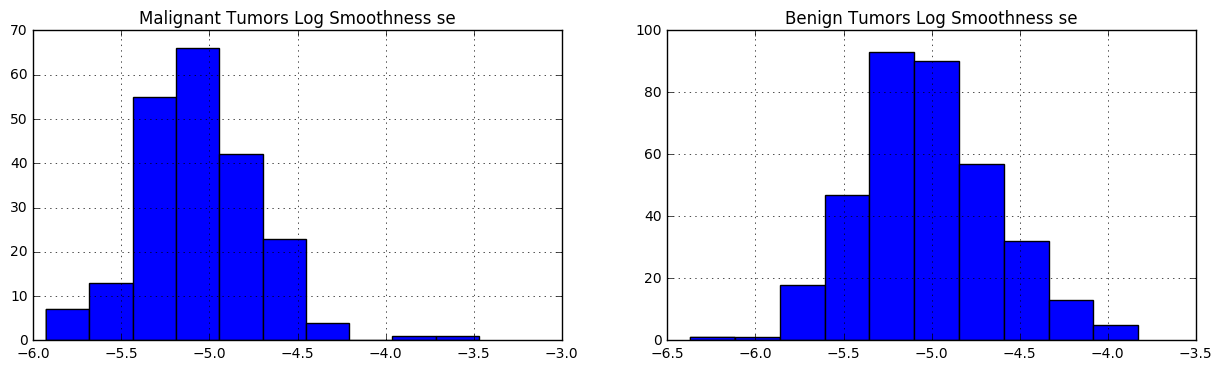

In [38]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize = (15,4))
axis1.set_title("Malignant Tumors Log Smoothness se")
temp = sqldata_M.toPandas()
temp['log_smoothness_se'].hist(bins = 10, ax = axis1)

axis2.set_title("Benign Tumors Log Smoothness se")
temp2 = sqldata_B.toPandas()


temp2['log_smoothness_se'].hist(bins = 10,ax = axis2)

plt.show()


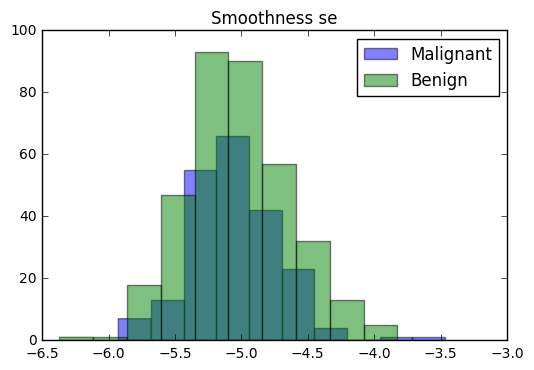

In [39]:
#Plotting them together
plt.hist(temp['log_smoothness_se'], bins = 10, alpha=0.5, label='Malignant')
plt.hist(temp2['log_smoothness_se'], bins = 10, alpha=0.5, label='Benign')
plt.legend(loc='upper right')
plt.title("Smoothness se")
plt.show()

In [40]:
"""
It is unclear whether or not smoothness SE says anything about whether a tumor is malignant or benign.



"""


'\nIt is unclear whether or not smoothness SE says anything about whether a tumor is malignant or benign.\n\n\n\n'

In [41]:
"""
5. Radius SE
"""

'\n5. Radius SE\n'

---Benign Tumors---
+---------+---------+-------------------+
|diagnosis|radius_se|      log_radius_se|
+---------+---------+-------------------+
|        B|   0.2699|-1.3097037589581781|
|        B|   0.1852| -1.686318956770058|
|        B|   0.2773|-1.2826553263604048|
|        B|   0.1839|-1.6933631473718616|
|        B|   0.1563|-1.8559780415547062|
+---------+---------+-------------------+
only showing top 5 rows


---Malignant Tumors---
+---------+---------+--------------------+
|diagnosis|radius_se|       log_radius_se|
+---------+---------+--------------------+
|        M|    1.095| 0.09075436326846412|
|        M|   0.5435|  -0.609725572420873|
|        M|   0.7456|-0.29356601561075557|
|        M|   0.4956| -0.7019861292271496|
|        M|   0.7572| -0.2781278596469693|
+---------+---------+--------------------+
only showing top 5 rows

---------------------------------------------------------------
---Benign Tumors:  357
+-------+---------+-------------------+---------------

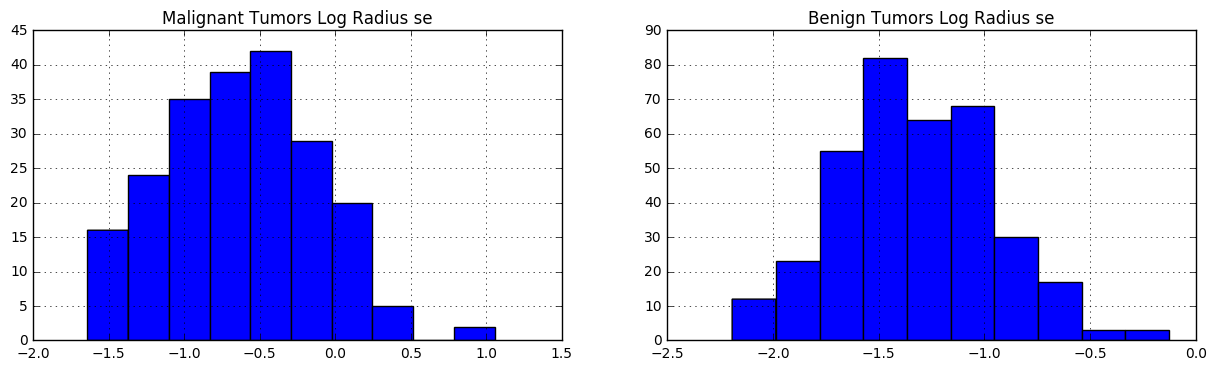

---------------------------------------------------------------


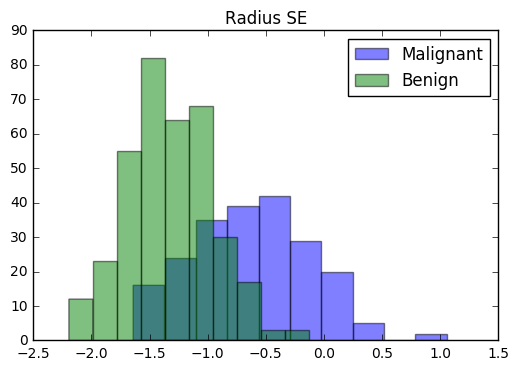

In [42]:
# Use SQL to create dataframes
sqldata_M = spark.sql("SELECT * FROM temp WHERE diagnosis = 'M'").select(data['diagnosis'],\
                                                                         data['radius_se'])
sqldata_B = spark.sql("SELECT * FROM temp WHERE diagnosis = 'B'").select(data['diagnosis'],\
                                                                         data['radius_se'])

# Create a log of the area_se
sqldata_M = sqldata_M.withColumn("log_radius_se",log("radius_se"))
sqldata_B = sqldata_B.withColumn("log_radius_se",log("radius_se"))

print "---Benign Tumors---"
sqldata_B.select(sqldata_B['diagnosis'],sqldata_B['radius_se'],sqldata_B['log_radius_se']).show(5)

print "\n---Malignant Tumors---"
sqldata_M.select(sqldata_M['diagnosis'],sqldata_M['radius_se'],sqldata_M['log_radius_se']).show(5)

print "---------------------------------------------------------------"
print "---Benign Tumors: ", sqldata_B.count()
sqldata_B.describe(['diagnosis','radius_se','log_radius_se']).show()

print "---Malignant Tumors: ", sqldata_M.count()
sqldata_M.describe(['diagnosis','radius_se','log_radius_se']).show()

print "---------------------------------------------------------------"


fig, (axis1,axis2) = plt.subplots(1,2,figsize = (15,4))
axis1.set_title("Malignant Tumors Log Radius se")
temp = sqldata_M.toPandas()
temp['log_radius_se'].hist(bins = 10, ax = axis1)

axis2.set_title("Benign Tumors Log Radius se")
temp2 = sqldata_B.toPandas()
temp2['log_radius_se'].hist(bins = 10,ax = axis2)

plt.show()

print "---------------------------------------------------------------"



#Plotting them together
plt.hist(temp['log_radius_se'], bins = 10, alpha=0.5, label='Malignant')
plt.hist(temp2['log_radius_se'], bins = 10, alpha=0.5, label='Benign')
plt.legend(loc='upper right')
plt.title("Radius SE")
plt.show()


In [42]:
"""


Looking at Worst



"""

'\n\n\nLooking at Worst\n\n\n\n'

In [43]:
"""
1. Area Worst
"""

'\n1. Area Worst\n'

In [59]:
# Use SQL to create dataframes
sqldata_M = spark.sql("SELECT * FROM temp WHERE diagnosis = 'M'").select(data['diagnosis'],\
                                                                         data['area_worst'])
sqldata_B = spark.sql("SELECT * FROM temp WHERE diagnosis = 'B'").select(data['diagnosis'],\
                                                                         data['area_worst'])

# Create a log of the area_mean
sqldata_M = sqldata_M.withColumn("log_area_worst",log("area_worst"))
sqldata_B = sqldata_B.withColumn("log_area_worst",log("area_worst"))

print "---Benign Tumors---"
sqldata_B.select(sqldata_B['diagnosis'],sqldata_B['area_worst'],sqldata_B['log_area_worst']).show(5)

print "\n---Malignant Tumors---"
sqldata_M.select(sqldata_M['diagnosis'],sqldata_M['area_worst'],sqldata_M['log_area_worst']).show(5)

print "---------------------------------------------------------------"
print "---Benign Tumors: ", sqldata_B.count()
sqldata_B.describe(['diagnosis','area_worst','log_area_worst']).show()

print "---Malignant Tumors: ", sqldata_M.count()
sqldata_M.describe(['diagnosis','area_worst','log_area_worst']).show()

---Benign Tumors---
+---------+----------+------------------+
|diagnosis|area_worst|    log_area_worst|
+---------+----------+------------------+
|        B|     711.2| 6.566953684199695|
|        B|     630.5| 6.446513155404975|
|        B|     314.9| 5.752255128106979|
|        B|     545.9|6.3024358087877115|
|        B|     242.2| 5.489763831118992|
+---------+----------+------------------+
only showing top 5 rows


---Malignant Tumors---
+---------+----------+-----------------+
|diagnosis|area_worst|   log_area_worst|
+---------+----------+-----------------+
|        M|      2019|7.610357618312838|
|        M|      1956|7.578656850594762|
|        M|      1709|7.443663683115591|
|        M|     567.7|6.341593110176681|
|        M|      1575|7.362010551259734|
+---------+----------+-----------------+
only showing top 5 rows

---------------------------------------------------------------
---Benign Tumors:  357
+-------+---------+-----------------+-----------------+
|summary|diagnos

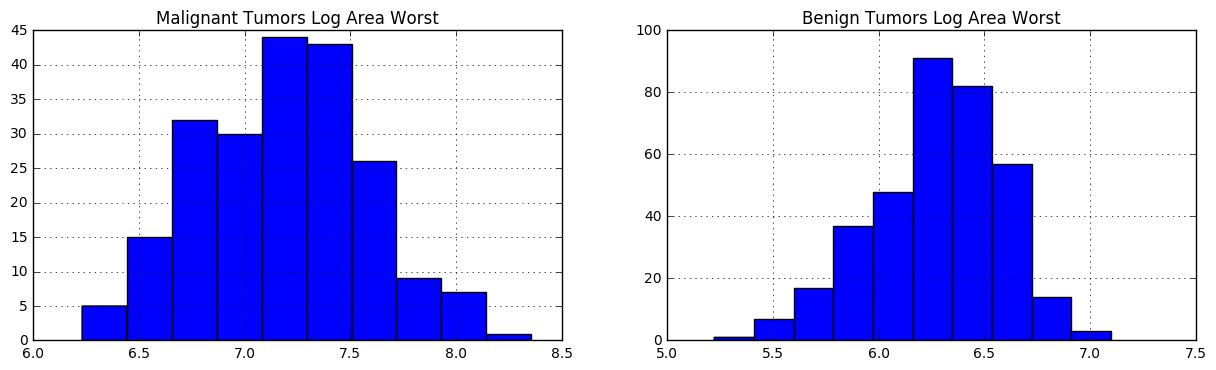

In [60]:
#plotting them seperately
fig, (axis1,axis2) = plt.subplots(1,2,figsize = (15,4))
axis1.set_title("Malignant Tumors Log Area Worst")
temp = sqldata_M.toPandas()
temp['log_area_worst'].hist(bins = 10, ax = axis1)

axis2.set_title("Benign Tumors Log Area Worst")
temp2 = sqldata_B.toPandas()
temp2['log_area_worst'].hist(bins = 10, ax = axis2)

plt.show()

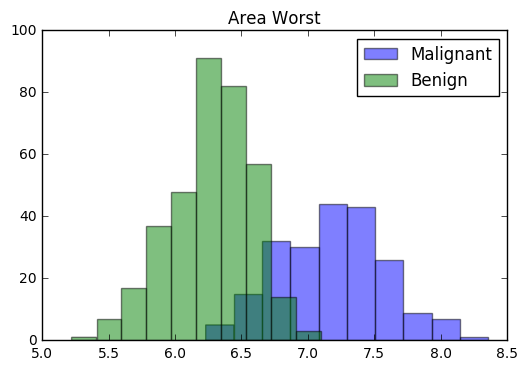

In [61]:
#Plotting them together
plt.hist(temp['log_area_worst'], bins = 10, alpha=0.5, label='Malignant')
plt.hist(temp2['log_area_worst'], bins = 10, alpha=0.5, label='Benign')
plt.legend(loc='upper right')
plt.title("Area Worst")
plt.show()

In [ ]:
"""
As expected, that the area worst is correlated with a higher chance of having a malignant tumor.
"""

In [47]:
"""
2. Compactness Worst
"""

'\n2. Compactness Worst\n'

In [48]:
sqldata_M = spark.sql("SELECT * FROM temp WHERE diagnosis = 'M'").select(data['diagnosis'],\
                                                                         data['compactness_worst'])
sqldata_B = spark.sql("SELECT * FROM temp WHERE diagnosis = 'B'").select(data['diagnosis'],\
                                                                         data['compactness_worst'])

sqldata_M = sqldata_M.withColumn("log_compactness_worst",log("compactness_worst"))
sqldata_B = sqldata_B.withColumn("log_compactness_worst",log("compactness_worst"))

print "---Benign Tumors---"
sqldata_B.select(sqldata_B['diagnosis'],sqldata_B['compactness_worst'],sqldata_B['log_compactness_worst']).show(5)

print "\n---Malignant Tumors---"
sqldata_M.select(sqldata_M['diagnosis'],sqldata_M['compactness_worst'],sqldata_M['log_compactness_worst']).show(5)

print "---------------------------------------------------------------"
print "---Benign Tumors: ", sqldata_B.count()
sqldata_B.describe(['diagnosis','compactness_worst','log_compactness_worst']).show()

print "---Malignant Tumors: ", sqldata_M.count()
sqldata_M.describe(['diagnosis','compactness_worst','log_compactness_worst']).show()

---Benign Tumors---
+---------+-----------------+---------------------+
|diagnosis|compactness_worst|log_compactness_worst|
+---------+-----------------+---------------------+
|        B|           0.1773|  -1.7299120659019749|
|        B|           0.2776|  -1.2815740503494875|
|        B|           0.1148|   -2.164563795096671|
|        B|          0.04619|   -3.074991954539623|
|        B|           0.1357|  -1.9973087121413138|
+---------+-----------------+---------------------+
only showing top 5 rows


---Malignant Tumors---
+---------+-----------------+---------------------+
|diagnosis|compactness_worst|log_compactness_worst|
+---------+-----------------+---------------------+
|        M|           0.6656| -0.40706638947513824|
|        M|           0.1866|  -1.6787879905688936|
|        M|           0.4245|  -0.8568432732307351|
|        M|           0.8663| -0.14352401008604249|
|        M|            0.205|   -1.584745299843729|
+---------+-----------------+------------------

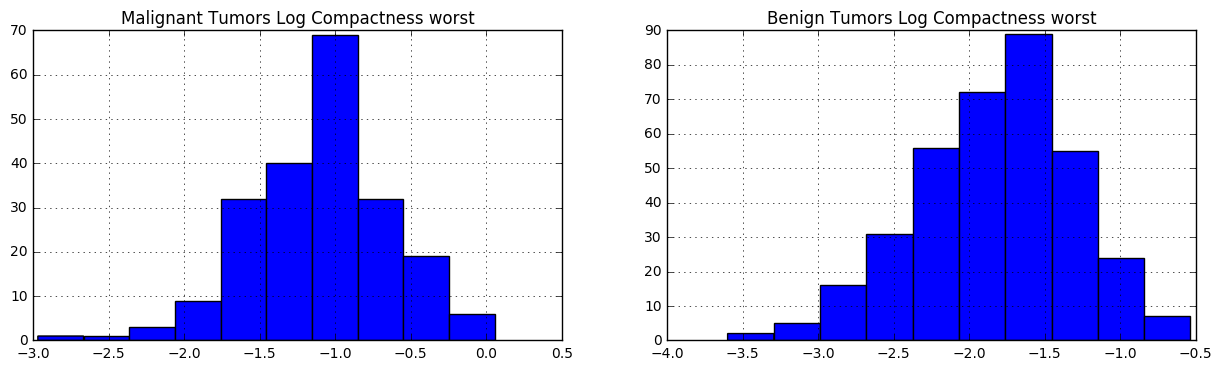

In [49]:
# Regular compactness is too clumped to make good histograms
fig, (axis1,axis2) = plt.subplots(1,2,figsize = (15,4))
axis1.set_title("Malignant Tumors Log Compactness worst")
temp = sqldata_M.toPandas()
temp['log_compactness_worst'].hist(bins = 10, ax = axis1)

axis2.set_title("Benign Tumors Log Compactness worst")
temp2 = sqldata_B.toPandas()
temp2['log_compactness_worst'].hist(bins = 10, ax = axis2)

plt.show()

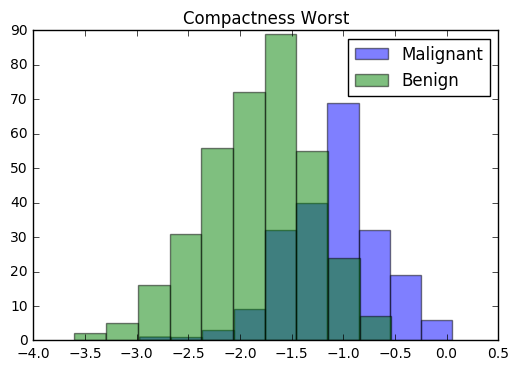

In [50]:
#Plotting them together
plt.hist(temp['log_compactness_worst'], bins = 10, alpha=0.5, label='Malignant')
plt.hist(temp2['log_compactness_worst'], bins = 10, alpha=0.5, label='Benign')
plt.legend(loc='upper right')
plt.title("Compactness Worst")
plt.show()

In [ ]:
"""
The more compact it was, the more likely of a malignant tumor.

"""

In [51]:
"""
3. Smoothness Mean
"""

'\n3. Smoothness Mean\n'

In [52]:
# Use SQL to create dataframes
sqldata_M = spark.sql("SELECT * FROM temp WHERE diagnosis = 'M'").select(data['diagnosis'],\
                                                                         data['smoothness_worst'])
sqldata_B = spark.sql("SELECT * FROM temp WHERE diagnosis = 'B'").select(data['diagnosis'],\
                                                                         data['smoothness_worst'])

# Create a log of the area_worst
sqldata_M = sqldata_M.withColumn("log_smoothness_worst",log("smoothness_worst"))
sqldata_B = sqldata_B.withColumn("log_smoothness_worst",log("smoothness_worst"))

print "---Benign Tumors---"
sqldata_B.select(sqldata_B['diagnosis'],sqldata_B['smoothness_worst'],sqldata_B['log_smoothness_worst']).show(5)

print "\n---Malignant Tumors---"
sqldata_M.select(sqldata_M['diagnosis'],sqldata_M['smoothness_worst'],sqldata_M['log_smoothness_worst']).show(5)

print "---------------------------------------------------------------"
print "---Benign Tumors: ", sqldata_B.count()
sqldata_B.describe(['diagnosis','smoothness_worst','log_smoothness_worst']).show()

print "---Malignant Tumors: ", sqldata_M.count()
sqldata_M.describe(['diagnosis','smoothness_worst','log_smoothness_worst']).show()


---Benign Tumors---
+---------+----------------+--------------------+
|diagnosis|smoothness_worst|log_smoothness_worst|
+---------+----------------+--------------------+
|        B|           0.144| -1.9379419794061366|
|        B|          0.1312| -2.0310324024721482|
|        B|          0.1324| -2.0219276354792295|
|        B|         0.09701|  -2.332941213008945|
|        B|          0.1297| -2.0425311876597387|
+---------+----------------+--------------------+
only showing top 5 rows


---Malignant Tumors---
+---------+----------------+--------------------+
|diagnosis|smoothness_worst|log_smoothness_worst|
+---------+----------------+--------------------+
|        M|          0.1622| -1.8189251373008244|
|        M|          0.1238| -2.0890879187316416|
|        M|          0.1444| -1.9351680525234112|
|        M|          0.2098| -1.5616005830199404|
|        M|          0.1374|  -1.984858899193888|
+---------+----------------+--------------------+
only showing top 5 rows

------

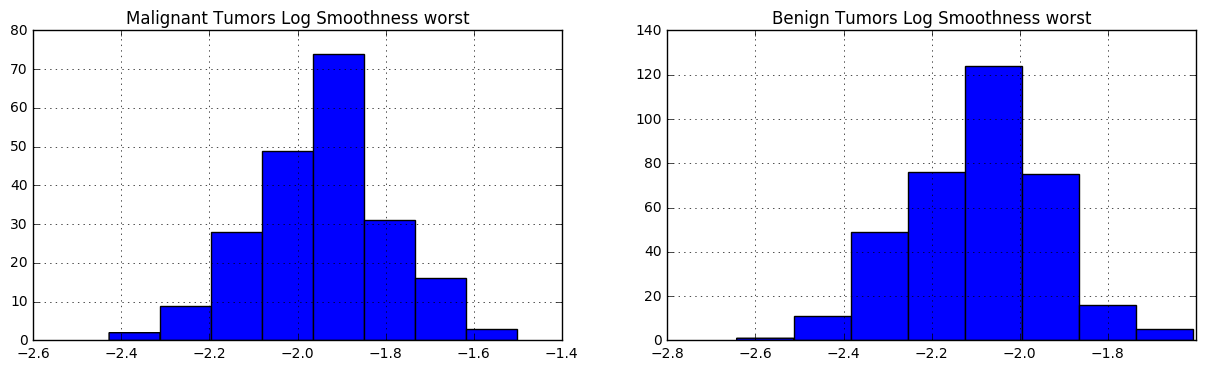

In [53]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize = (15,4))
axis1.set_title("Malignant Tumors Log Smoothness worst")
temp = sqldata_M.toPandas()
temp['log_smoothness_worst'].hist(bins = 8, ax = axis1)

axis2.set_title("Benign Tumors Log Smoothness worst")
temp2 = sqldata_B.toPandas()
temp2['log_smoothness_worst'].hist(bins = 8, ax = axis2)

plt.show()


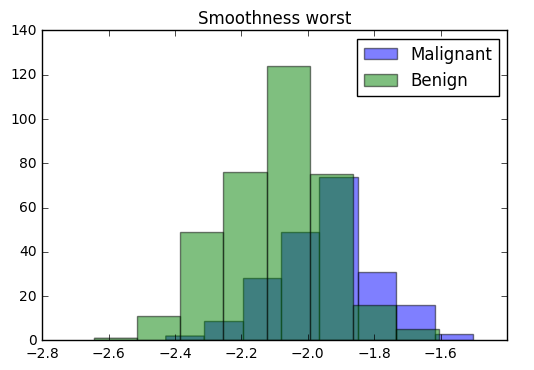

In [54]:
#Plotting them together
plt.hist(temp['log_smoothness_worst'], bins = 8, alpha=0.5, label='Malignant')
plt.hist(temp2['log_smoothness_worst'], bins = 8, alpha=0.5, label='Benign')
plt.legend(loc='upper right')
plt.title("Smoothness worst")
plt.show()


In [ ]:
"""
It seems in this case the more smooth a tumor is, the more likely a malignant tumo. 
It doesn't seem to too much of an impactful category for determining this though.

"""

In [55]:
"""
4. Radius Worst
"""

'\n4. Radius Worst\n'

In [56]:
# Use SQL to create dataframes
sqldata_M = spark.sql("SELECT * FROM temp WHERE diagnosis = 'M'").select(data['diagnosis'],\
                                                                         data['radius_worst'])
sqldata_B = spark.sql("SELECT * FROM temp WHERE diagnosis = 'B'").select(data['diagnosis'],\
                                                                         data['radius_worst'])

# Create a log of the area_se
sqldata_M = sqldata_M.withColumn("log_radius_worst",log("radius_worst"))
sqldata_B = sqldata_B.withColumn("log_radius_worst",log("radius_worst"))

print "---Benign Tumors---"
sqldata_B.select(sqldata_B['diagnosis'],sqldata_B['radius_worst'],sqldata_B['log_radius_worst']).show(5)

print "\n---Malignant Tumors---"
sqldata_M.select(sqldata_M['diagnosis'],sqldata_M['radius_worst'],sqldata_M['log_radius_worst']).show(5)

print "---------------------------------------------------------------"
print "---Benign Tumors: ", sqldata_B.count()
sqldata_B.describe(['diagnosis','radius_worst','log_radius_worst']).show()

print "---Malignant Tumors: ", sqldata_M.count()
sqldata_M.describe(['diagnosis','radius_worst','log_radius_worst']).show()


---Benign Tumors---
+---------+------------+------------------+
|diagnosis|radius_worst|  log_radius_worst|
+---------+------------+------------------+
|        B|       15.11| 2.715356776284648|
|        B|        14.5|2.6741486494265287|
|        B|       10.23| 2.325324579963535|
|        B|        13.3|2.5877640352277083|
|        B|       8.964|2.1932165559386805|
+---------+------------+------------------+
only showing top 5 rows


---Malignant Tumors---
+---------+------------+------------------+
|diagnosis|radius_worst|  log_radius_worst|
+---------+------------+------------------+
|        M|       25.38|3.2339614622862416|
|        M|       24.99| 3.218475744846861|
|        M|       23.57|3.1599747169480397|
|        M|       14.91| 2.702032128776647|
|        M|       22.54|  3.11529150861163|
+---------+------------+------------------+
only showing top 5 rows

---------------------------------------------------------------
---Benign Tumors:  357
+-------+---------+--------

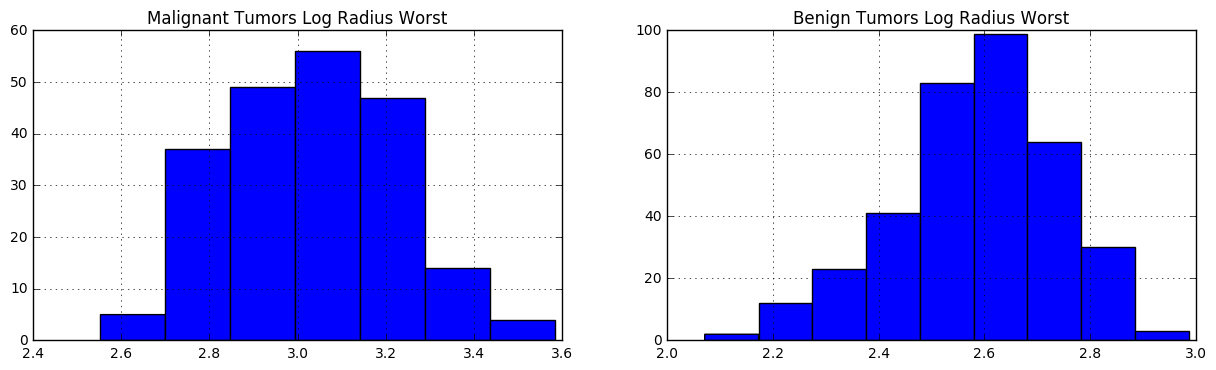

In [57]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize = (15,4))
axis1.set_title("Malignant Tumors Log Radius Worst")
temp = sqldata_M.toPandas()
temp['log_radius_worst'].hist(bins = 7, ax = axis1)

axis2.set_title("Benign Tumors Log Radius Worst")
temp2 = sqldata_B.toPandas()
temp2['log_radius_worst'].hist(bins = 9, ax = axis2)

plt.show()

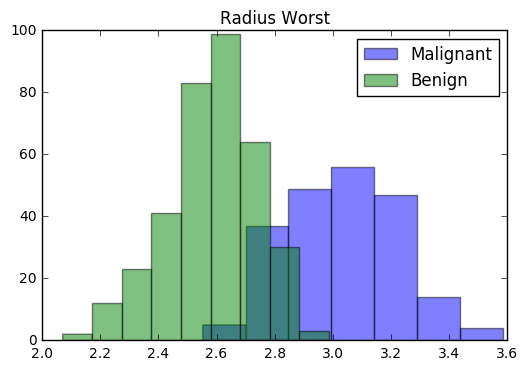

In [58]:
plt.hist(temp['log_radius_worst'], bins = 7, alpha=0.5, label='Malignant')
plt.hist(temp2['log_radius_worst'], bins = 9, alpha=0.5, label='Benign')
plt.legend(loc='upper right')
plt.title("Radius Worst")
plt.show()

In [ ]:

"""

It seems the radius is the most impactful when it comes to determining whether or not a tumor is
malignant or benign when we look overall at the three possible types of categories. (Mean, SE, Worst)



"""

